<a href="https://colab.research.google.com/github/SoremiKayode/COMP5000-2022-labs/blob/main/Customer_Churn_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer Churn Prediction For a Telecommunication Network**
>Telecommunication customer churn prediction plays a crucial role in reducing customer attrition rates and improving customer retention strategies. This study focuses on utilizing machine learning algorithms, namely Logistic Regression, K-Nearest Neighbours (KNN), Support Vector Machine (SVM), and Deep Learning, to predict customer churn in the telecommunication industry. The research incorporates feature engineering techniques, such as removing irrelevant data and up sampling the dataset to achieve class balance. The main objective is to evaluate the performance of these algorithms and conduct parameter tuning for enhanced results.

>The experimental results demonstrate that SVM achieves an accuracy of 89.9%, precision of 89.9%, and recall of 89.9% in predicting customer churn. The KNN model achieves an accuracy of 78%, precision of 80%, and recall of 80%. The optimized version of Logistic Regression yields an accuracy of 77.1%, precision of 77.2%, and recall of 77.1%. The Deep Learning model achieves an accuracy, precision, and recall of 85%.

>The parameter tuning process involves optimizing the hyperparameters of each algorithm. For SVM, parameters such as the kernel type, regularization parameter, and gamma value are fine-tuned. In KNN, the number of neighbours is optimized. Logistic Regression is optimized by tuning the regularization parameter and learning rate. Deep Learning involves tuning parameters such as the number of layers, activation functions, and learning rate.

>The findings of this research suggest that SVM outperforms other algorithms in terms of accuracy, precision, and recall. However, KNN, Logistic Regression, and Deep Learning also provide reasonably good results. The study highlights the significance of feature engineering and parameter tuning in improving the performance of machine learning algorithms for customer churn prediction in the telecommunication sector. These predictive models can assist telecommunication companies in identifying at-risk customers and implementing targeted retention strategies to reduce churn rates, enhance customer satisfaction, and ultimately improve business profitability.


##**Outline of building the machine learning prediction model**.

###**Data Analysis:**
* Checking data summary and info
* Removing unwanted column
* working on missing data
* Plotting the distribution of features with categorical data on an histogram
* Checking for correlation among features of the dataset.

###**Data Preprocessing**
* one hot encoding categorical data using pandas pd.features
* Scaling the input to zero and one using scikit learn MinMaxScaler
* splitting dataset into training and testing.
* searching for the best parameter to use.

##**Importing the needed library**

In [40]:
!pip install scikeras[tensorflow]
!pip install scikit-plot==0.3.7

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, PrecisionRecallDisplay, classification_report, confusion_matrix
from scikeras.wrappers import KerasClassifier



###**Loading the Dataset**

In [42]:
# loading the dataset
data = pd.read_excel("drive/MyDrive/Colab Notebooks/Telco_customer_churn.xlsx")
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


###**Getting the list of all the Features**

In [43]:
column = data.columns
print(len(column))
column
# The lenght of the columns is 33

33


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

###**Insight into the Dataset**

In [44]:
print("The Data Summary")
print(data.describe())

The Data Summary
        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          3

In [45]:
print("The data info is")
print(data.info())

The data info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Interne

####**Handling Missing Data and missing column**

It happens that there are no missing data in the dataset, except for the churn reason column, it will not be appropriate to include churn reason in the dataset, there is possibility for using the model to predict the churn possibility of cutomer who haven't spent much time with the company and definitely haven't churned, so we will drop the column alonside "CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', and 'Longitude Churn Score, CLTV, Churn Reason' "we want to focus on features that has high probability of affecting our predictions

In [46]:
wanted_columns = column[9:-3]
data = data[wanted_columns]

We will create a function to return the columns which are object and value count is not greater than 20

In [47]:
def get_categorical_columns(data):
  cat_columns = []
  for col in data.columns:
    if data[col].dtype == "O" or data[col].value_counts().shape[0] < 20 :
      cat_columns.append(col)
  return cat_columns

In [48]:
categorical_columns = get_categorical_columns(data)

writing a function to plot the histogram of each categorical columns

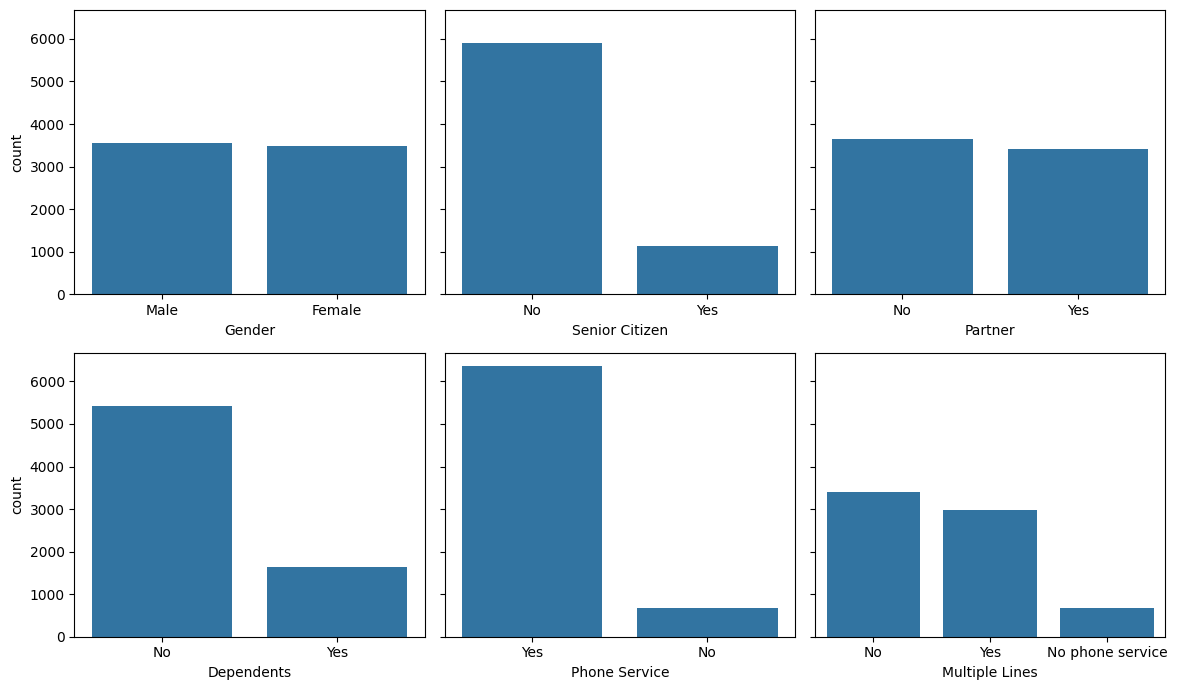

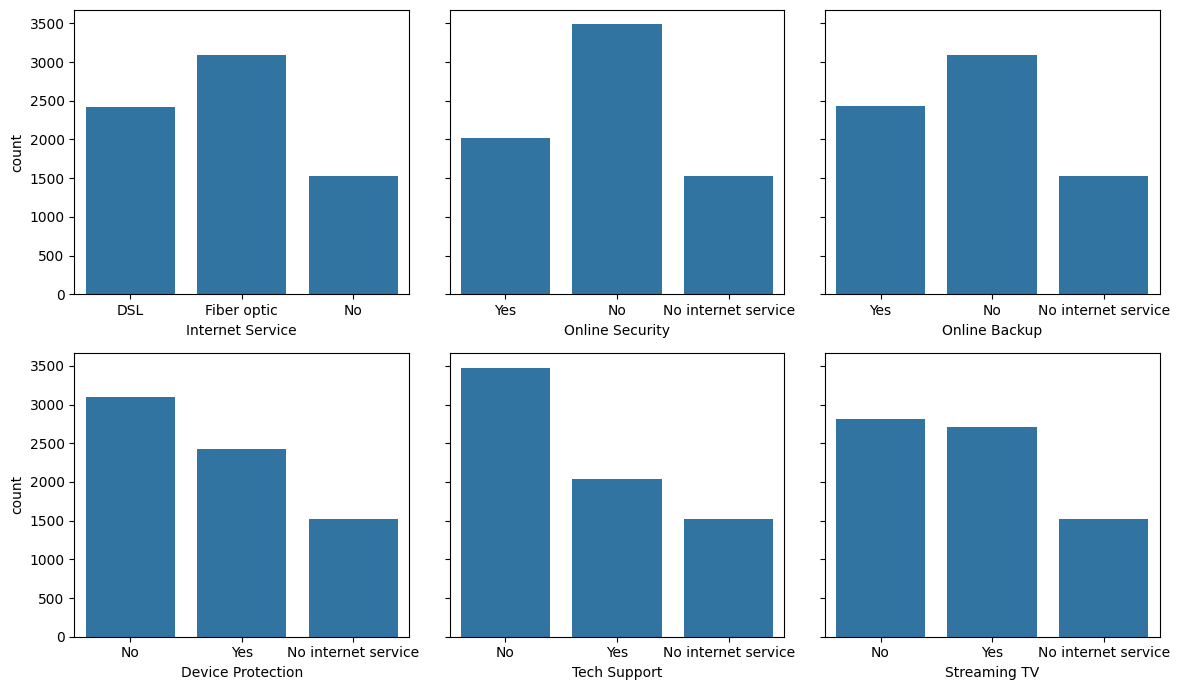

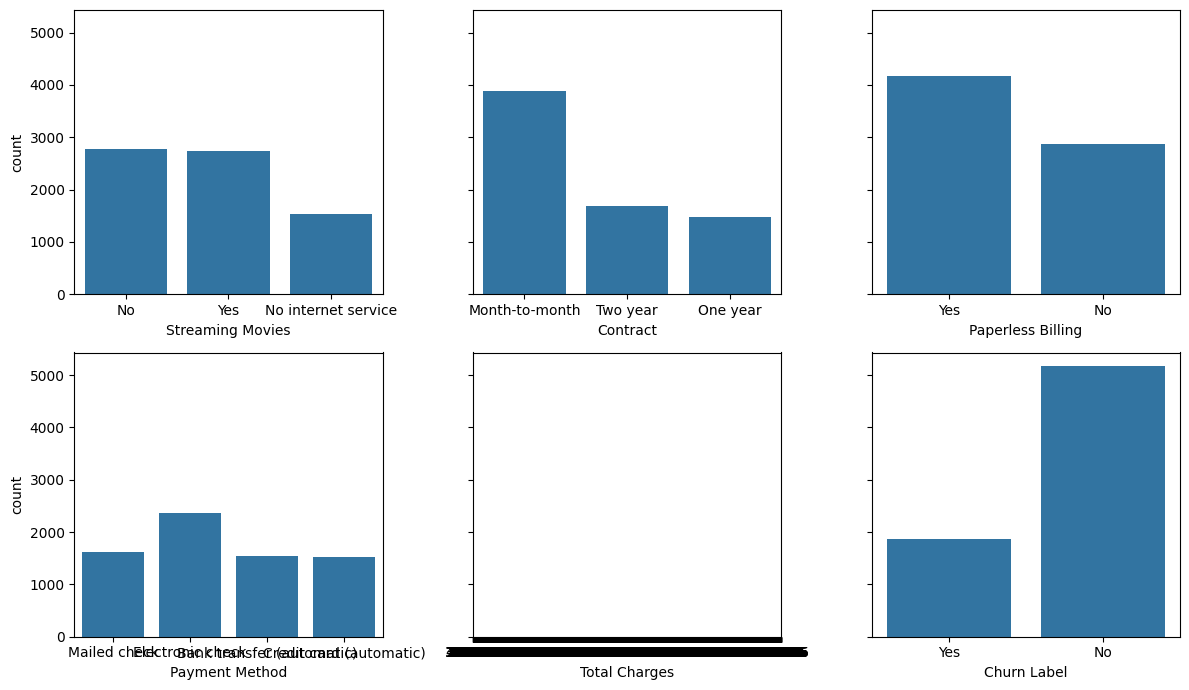

In [49]:
def plot_all_categorical_columns(data, columns, arrangement):
    len_columns = len(columns)
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

    for y in range(len_columns):
        sns.countplot(x=columns[y], data=data, ax=axes[arrangement[y][0], arrangement[y][1]])

    plt.tight_layout()
    plt.show()

# Example usage
first_columns = categorical_columns[:6]
second_columns = categorical_columns[6:12]
third_columns = categorical_columns[12:18]
arrangement = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

plot_all_categorical_columns(data, first_columns, arrangement)
plot_all_categorical_columns(data, second_columns, arrangement)
plot_all_categorical_columns(data, third_columns, arrangement)




###**Plotting Continuous Data**

<Axes: xlabel='Churn Value', ylabel='Monthly Charges'>

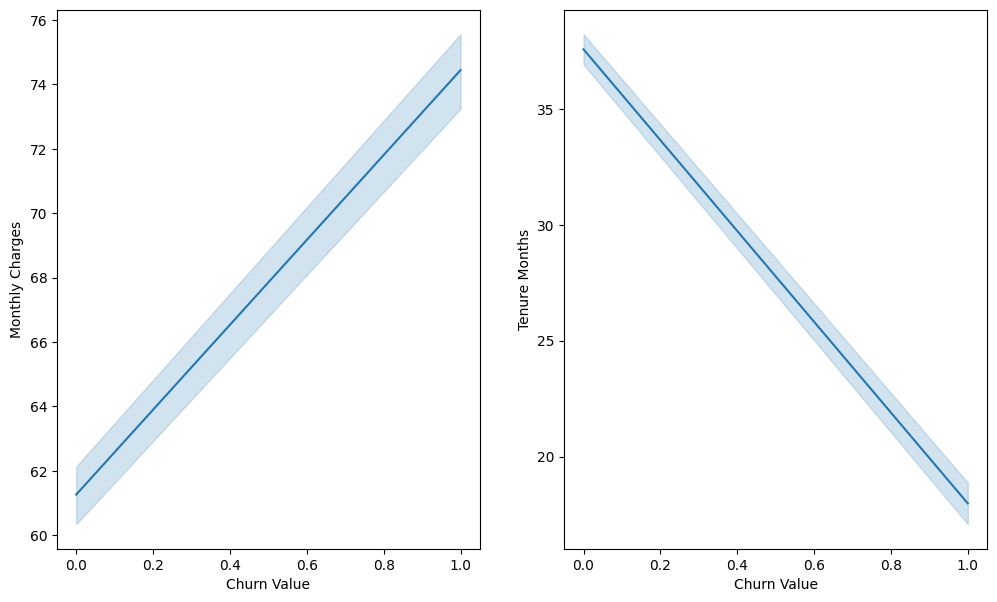

In [50]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.lineplot(y="Tenure Months", x="Churn Value", data=data)
sns.lineplot(y="Monthly Charges", x="Churn Value", data=data, ax=axes[0])

###**Data Processing**

####**Removing unwanted Column**

In [51]:
data = data[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Value']]

####**Seperating Categorical Column**

In [52]:
cat_column = [x for x in data.columns if data[x].dtype=="O"]

In [53]:
cat_column = ['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

###**One Hot Encoding**

In [54]:
X = pd.get_dummies(data=data, columns=cat_column, drop_first=True)

###**Scaling Non Categorical Data**

In [55]:
# scaling categorical data
sc = MinMaxScaler()
a = sc.fit_transform(X[['Tenure Months']])
b = sc.fit_transform(X[['Monthly Charges']])

In [56]:
X['Tenure Months'] = a
X['Monthly Charges'] = b

In [57]:
X.drop("Total Charges", axis=1, inplace=True)

###**Upsampling the Data to Create a Balance between the two output Classs**

In [58]:
# setting variable y to the churn value
y = data["Churn Value"]
y

#including churn prediction back so we can upsample it to balance out
X["Churn Value"] = y

###**Splitting the Dataset into yes or no**

In [59]:
# splitting the dataset into yes or no
x_no = X[X["Churn Value"] == 0]
x_yes = X[X["Churn Value"] == 1]

In [60]:
print(len(x_no))
print(len(x_yes))

5174
1869


###**Upsampling the yes dataset to be the same size as the no dataset**

In [61]:
# upsampling the yes dataset to be the samw size as the no dataset
x_yes_upsampled = x_yes.sample(n=len(x_no), replace=True, random_state=42)

###**Joining the Dataset**

In [62]:
# Joining both datasets
x_upsampled = pd.concat([x_no, x_yes_upsampled]).reset_index(drop=True)

In [63]:
y = x_upsampled["Churn Value"]
x_upsampled.drop("Churn Value", axis=1, inplace = True)

In [64]:
x_upsampled

,Tenure Months,Monthly Charges,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.013889,0.115423,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.472222,0.385075,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.625000,0.239303,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.305556,0.704975,True,False,False,True,True,False,True,True,...,False,True,False,False,False,False,True,True,False,False
4,0.138889,0.114428,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0.708333,0.408458,True,False,True,False,False,True,False,False,...,False,True,False,True,True,False,False,False,True,False
10344,0.041667,0.518905,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
10345,0.833333,0.771144,True,False,True,False,True,False,True,True,...,False,True,False,False,False,False,True,False,True,False
10346,0.027778,0.309950,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [65]:
y

,Churn Value
0,0
1,0
2,0
3,0
4,0
...,...
10343,1
10344,1
10345,1
10346,1


###**Converting y label to Categorical**

In [66]:
# we need to convert he y label to categorical
y = tf.keras.utils.to_categorical(y)

In [67]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

###**Splitting the dataset into training and testing**

In [68]:
# splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_upsampled, y, test_size=0.3, random_state=42)

###**Highlight of what to do at the next stage**

* Use Logistic regression and plot the result
* knearest neighbour and plot the accuracy, precision and recall
* Use support vector machine (svm) and plot the result
* Use Deep learning and plot the result


##**Building The training Model**

###**We have put all the Data preprocessing in one file, let's import it**

In [69]:
# importing the python file that contain the data preprocessing function
from drive.MyDrive import customer_churnfuction

In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def get_categorical_columns(data):
    """
    Identify categorical columns in the dataset.
    A column is considered categorical if its dtype is object ('O') or has fewer than 20 unique values.
    """
    cat_columns = []
    for col in data.columns:
        if data[col].dtype == "O" or data[col].value_counts().shape[0] < 20:
            cat_columns.append(col)
    return cat_columns

def perform_data_preprocessing(data_to_load):
    """
    Load the dataset and perform preprocessing for machine learning models.
    Steps include selecting columns, encoding categorical variables, scaling numerical features,
    upsampling imbalanced data, and splitting into train/test sets.
    """
    # Load the dataset
    data = pd.read_excel(data_to_load)
    column = data.columns
    wanted_columns = column[9:-3]  # Select specific columns
    data = data[wanted_columns]

    # Get categorical columns (not used directly here but kept for consistency)
    categorical_columns = get_categorical_columns(data)

    # Explicitly select and order columns, including prediction label
    data = data[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
                 'Phone Service', 'Multiple Lines', 'Internet Service',
                 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
                 'Payment Method', 'Monthly Charges', 'Total Charges',
                 'Churn Value']]

    # Define categorical columns for one-hot encoding
    cat_column = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                  'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                  'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                  'Contract', 'Paperless Billing', 'Payment Method']

    # One-hot encode categorical data
    X = pd.get_dummies(data=data, columns=cat_column, drop_first=True)

    # Scale numerical columns
    sc = MinMaxScaler()
    a = sc.fit_transform(X[['Tenure Months']])
    b = sc.fit_transform(X[['Monthly Charges']])
    X['Tenure Months'] = a
    X['Monthly Charges'] = b

    # Drop 'Total Charges' column
    X.drop("Total Charges", axis=1, inplace=True)

    # Set target variable y to 'Churn Value'
    y = X["Churn Value"]

    # Include churn prediction for upsampling
    X["Churn Value"] = y

    # Split into 'no' (0) and 'yes' (1) churn datasets
    x_no = X[X["Churn Value"] == 0]
    x_yes = X[X["Churn Value"] == 1]

    # Upsample the 'yes' dataset to match the size of 'no'
    x_yes_upsampled = x_yes.sample(n=len(x_no), replace=True, random_state=42)

    # Join both datasets using pd.concat instead of append
    x_upsampled = pd.concat([x_no, x_yes_upsampled]).reset_index(drop=True)

    # Separate features and target after upsampling
    y = x_upsampled["Churn Value"]
    x_upsampled.drop("Churn Value", axis=1, inplace=True)

    # Split into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x_upsampled, y, test_size=0.3, random_state=42)

    return (x_train, x_test, y_train, y_test)

# Example usage in Colab
# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

# Call the function with your file path
x_train, x_test, y_train, y_test = perform_data_preprocessing("/content/drive/MyDrive/Colab Notebooks/Telco_customer_churn.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# loading the function
x_train, x_test, y_train, y_test = perform_data_preprocessing("drive/MyDrive/Colab Notebooks/Telco_customer_churn.xlsx")

##**Logistic Regression**

Logistic regression is a statistical algorithm used for binary classification tasks. It predicts the probability of an instance belonging to a certain class based on input features. Despite its name, it is primarily used for classification, not regression.

In logistic regression, we start with a linear model that combines the input features linearly. The linear model can be represented as:

z = b₀ + b₁x₁ + b₂x₂ + ... + bₚxₚ

Here, z is the linear combination of the input features (x₁, x₂, ..., xₚ), b₀ is the bias term, and b₁, b₂, ..., bₚ are the coefficients (weights) associated with each feature.

To map the linear output (z) to a probability value between 0 and 1, logistic regression uses the sigmoid function (also known as the logistic function). The sigmoid function is defined as:

σ(z) = 1 / (1 + e^(-z))

In the equation, e represents the base of the natural logarithm, and -z is the input to the exponential function. The sigmoid function takes the linear output (z) and squashes it into a value between 0 and 1, representing the estimated probability of the positive class.

During the training process, logistic regression aims to find the best set of coefficients (b₀, b₁, ..., bₚ) that maximizes the likelihood of the observed data. This is done by minimizing a cost function called log loss (also known as cross-entropy loss). The log loss penalizes large differences between the predicted probabilities and the true labels.

Optimization algorithms, such as gradient descent or its variants, are used to minimize the cost function and find the optimal coefficients. These algorithms iteratively update the coefficients based on the gradient (derivative) of the cost function with respect to the coefficients. The process continues until convergence is reached, indicating that the coefficients have reached their optimal values.


###**Function to Train, Evaluate and Plot Result of Logistic Regression**

The accuracy is 0.7710
The precision is 0.7728
The recall is 0.7710


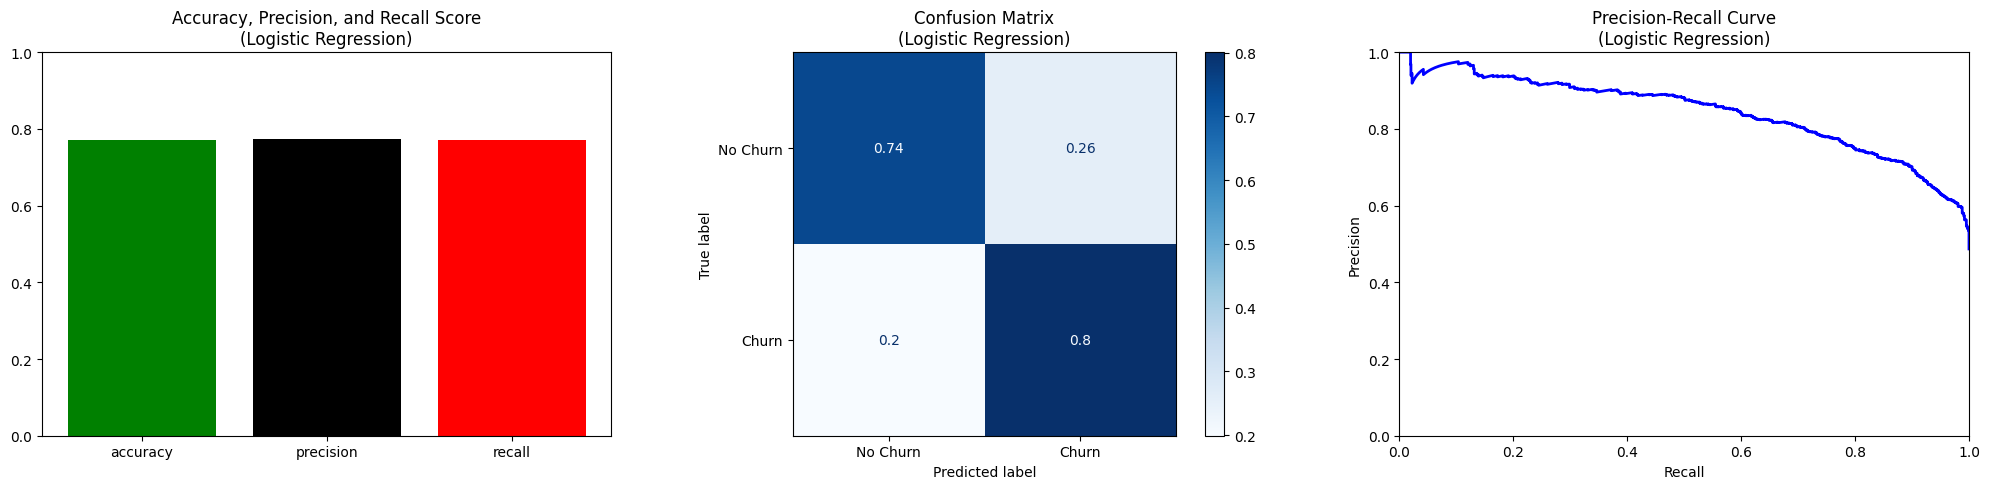

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import tensorflow as tf

def evaluate_logistic_regression(x_train, y_train, x_test, y_test):
    """
    Evaluate a logistic regression model on the given train/test data.
    Outputs accuracy, precision, recall, confusion matrix, and precision-recall curve.
    """
    # Create an instance of the logistic regression model
    logistic_regression = LogisticRegression(max_iter=1000)  # Added max_iter to ensure convergence

    # Fit the model
    logistic_regression.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = logistic_regression.predict(x_test)
    y_pred_proba = logistic_regression.predict_proba(x_test)  # For precision-recall curve

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"The accuracy is {accuracy:.4f}")
    print(f"The precision is {precision:.4f}")
    print(f"The recall is {recall:.4f}")

    # Create a dictionary for the bar plot
    datapoint = {"accuracy": accuracy, "precision": precision, "recall": recall}

    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    # Plot the accuracy, precision, and recall
    bars = axs[0].bar(list(datapoint.keys()), list(datapoint.values()), color=['green', 'black', 'red'])
    axs[0].set_title("Accuracy, Precision, and Recall Score\n(Logistic Regression)")
    axs[0].set_ylim(0, 1)  # Set y-axis limit for clarity

    # Plot the confusion matrix (normalized)
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn']).plot(ax=axs[1], cmap='Blues')
    axs[1].set_title("Confusion Matrix\n(Logistic Regression)")

    # Plot the precision-recall curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])  # Use probabilities for positive class
    axs[2].plot(recall_vals, precision_vals, color='blue', lw=2)
    axs[2].set_title("Precision-Recall Curve\n(Logistic Regression)")
    axs[2].set_xlabel("Recall")
    axs[2].set_ylabel("Precision")
    axs[2].set_xlim(0, 1)
    axs[2].set_ylim(0, 1)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

evaluate_logistic_regression(x_train, y_train, x_test, y_test)

###**Optimizing Logistic Regression and Plotting the Result**

Best Parameters:  {'C': 1, 'penalty': 'l2'}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1593
           1       0.75      0.80      0.77      1512

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105

The accuracy is 0.7710
The precision is 0.7728
The recall is 0.7710


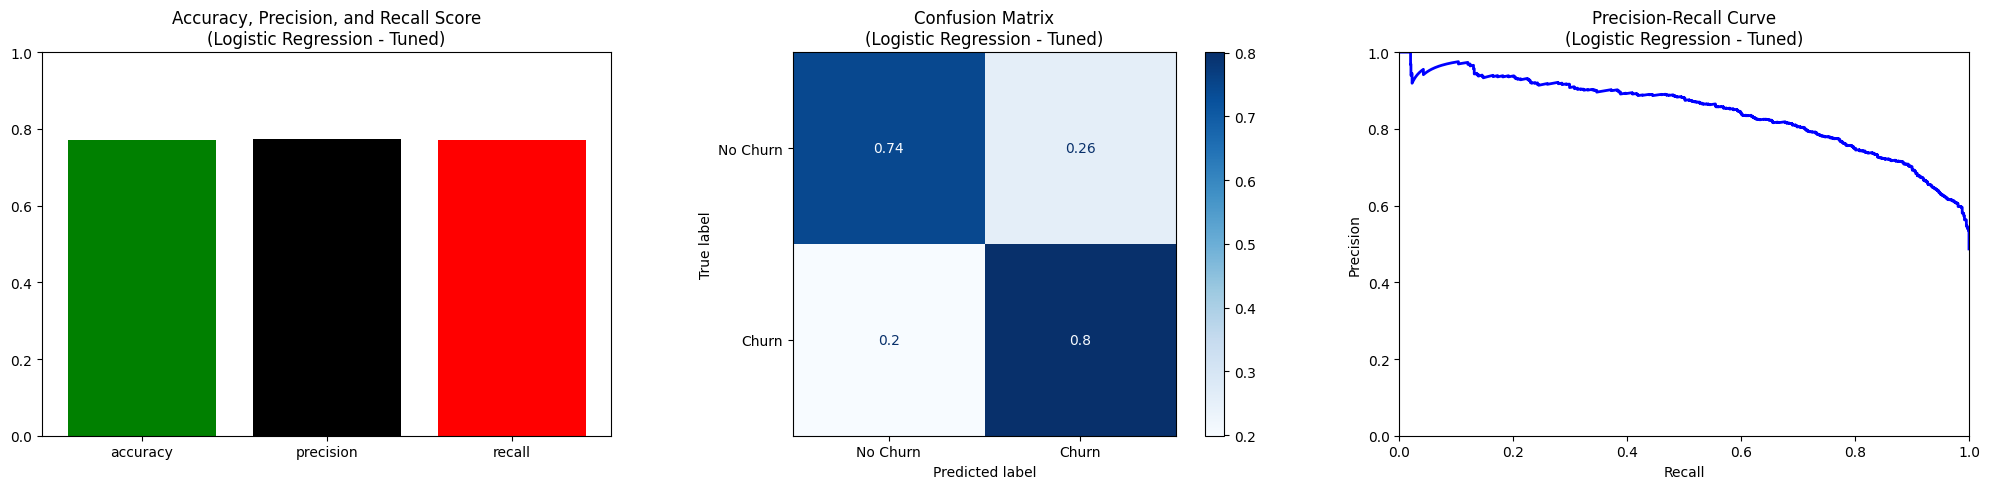

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import tensorflow as tf

def tune_and_evaluate_logistic_regression(x_train, y_train, x_test, y_test):
    """
    Tune a logistic regression model with GridSearchCV and evaluate its performance.
    Outputs best parameters, classification report, accuracy/precision/recall, and plots.
    """
    # Define the parameter grid for GridSearchCV
    param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}  # 'none' replaced with valid option

    # Create an instance of LogisticRegression
    logistic_regression = LogisticRegression(max_iter=1000, solver='lbfgs')  # Specify solver for l2

    # Create an instance of GridSearchCV
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

    # Fit the model on the training data
    grid_search.fit(x_train, y_train)

    # Print the best parameters found by GridSearchCV
    print("Best Parameters: ", grid_search.best_params_)

    # Predict on the test set using the best model
    y_pred = grid_search.predict(x_test)
    y_pred_proba = grid_search.predict_proba(x_test)  # For precision-recall curve

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"The accuracy is {accuracy:.4f}")
    print(f"The precision is {precision:.4f}")
    print(f"The recall is {recall:.4f}")

    # Create a dictionary for the graph
    datapoint = {"accuracy": accuracy, "precision": precision, "recall": recall}

    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    # Plot the accuracy, precision, and recall
    bars = axs[0].bar(list(datapoint.keys()), list(datapoint.values()), color=['green', 'black', 'red'])
    axs[0].set_title("Accuracy, Precision, and Recall Score\n(Logistic Regression - Tuned)")
    axs[0].set_ylim(0, 1)  # Set y-axis limit for clarity

    # Plot the confusion matrix (normalized)
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn']).plot(ax=axs[1], cmap='Blues')
    axs[1].set_title("Confusion Matrix\n(Logistic Regression - Tuned)")

    # Plot the precision-recall curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])  # Use probabilities for positive class
    axs[2].plot(recall_vals, precision_vals, color='blue', lw=2)
    axs[2].set_title("Precision-Recall Curve\n(Logistic Regression - Tuned)")
    axs[2].set_xlabel("Recall")
    axs[2].set_ylabel("Precision")
    axs[2].set_xlim(0, 1)
    axs[2].set_ylim(0, 1)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
tune_and_evaluate_logistic_regression(x_train, y_train, x_test, y_test)

##**Training Testing and Plotting Support Vector Machine**

The accuracy is 0.7536
The precision is 0.7612
The recall is 0.7536
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74      1593
           1       0.71      0.83      0.77      1512

    accuracy                           0.75      3105
   macro avg       0.76      0.76      0.75      3105
weighted avg       0.76      0.75      0.75      3105



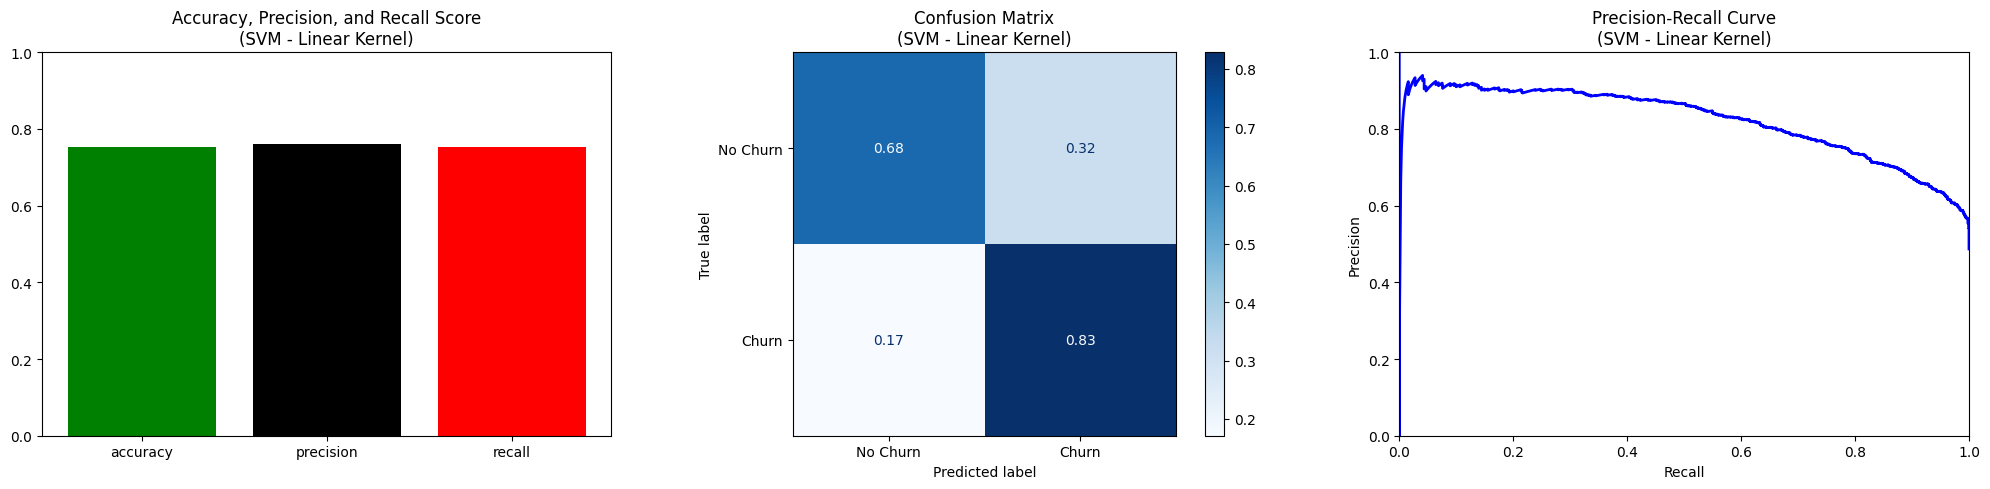

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

def train_and_evaluate_svm(x_train, y_train, x_test, y_test):
    """
    Train and evaluate an SVM classifier with a linear kernel.
    Outputs accuracy, precision, recall, confusion matrix, and precision-recall curve.
    """
    # Create an SVM classifier with linear kernel and probability enabled
    clf = SVC(kernel='linear', probability=True)  # probability=True for predict_proba

    # Train the classifier
    clf.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)  # Get probabilities for precision-recall curve

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"The accuracy is {accuracy:.4f}")
    print(f"The precision is {precision:.4f}")
    print(f"The recall is {recall:.4f}")

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Create a dictionary for the graph
    datapoint = {"accuracy": accuracy, "precision": precision, "recall": recall}

    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    # Plot the accuracy, precision, and recall
    bars = axs[0].bar(list(datapoint.keys()), list(datapoint.values()), color=['green', 'black', 'red'])
    axs[0].set_title("Accuracy, Precision, and Recall Score\n(SVM - Linear Kernel)")
    axs[0].set_ylim(0, 1)  # Set y-axis limit for clarity

    # Plot the confusion matrix (normalized)
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn']).plot(ax=axs[1], cmap='Blues')
    axs[1].set_title("Confusion Matrix\n(SVM - Linear Kernel)")

    # Plot the precision-recall curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])  # Use probabilities for positive class
    axs[2].plot(recall_vals, precision_vals, color='blue', lw=2)
    axs[2].set_title("Precision-Recall Curve\n(SVM - Linear Kernel)")
    axs[2].set_xlabel("Recall")
    axs[2].set_ylabel("Precision")
    axs[2].set_xlim(0, 1)
    axs[2].set_ylim(0, 1)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

train_and_evaluate_svm(x_train, y_train, x_test, y_test)